# `Case Study Linear Regression`

### Liabraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

from warnings import filterwarnings
filterwarnings(action='ignore')

### Sample data points

In [4]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=30,random_state=53)

In [5]:
df = pd.DataFrame(np.concatenate([X,np.expand_dims(y,1)],axis=1),columns=['X','y'])
df.head()

,X,y
0,0.503622,34.658894
1,1.802009,158.915555
2,-0.623148,-72.306025
3,-0.406043,-29.432096
4,-0.617011,-26.333059


### taking absolute values

In [6]:
X = np.abs(X)
y = np.abs(y)

In [7]:
df = pd.DataFrame(np.concatenate([X,np.expand_dims(y,1)],axis=1),columns=['X','y'])
df.head()

,X,y
0,0.503622,34.658894
1,1.802009,158.915555
2,0.623148,72.306025
3,0.406043,29.432096
4,0.617011,26.333059


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=45)

### Data points

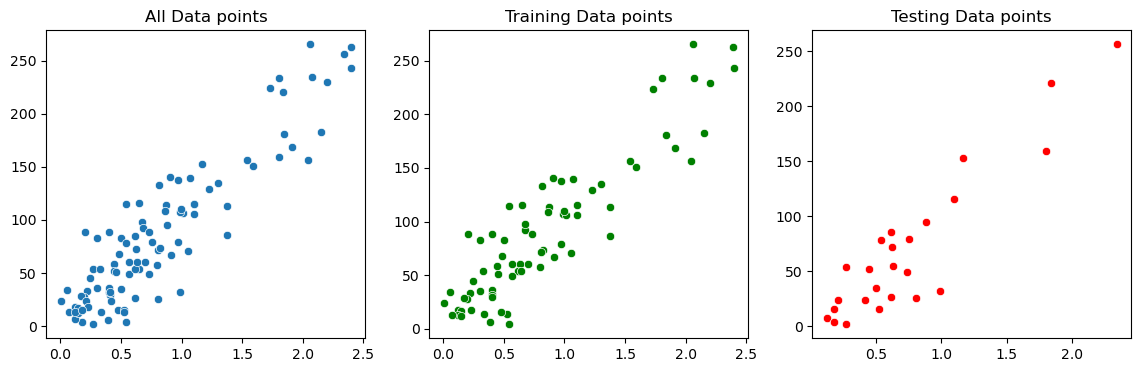

In [9]:
fig,ax = plt.subplots(1,3,figsize=(14,4))

plt.subplot(131)
sns.scatterplot(X.flatten(),y.flatten())
plt.title("All Data points")
plt.subplot(132)
sns.scatterplot(X_train.flatten(),y_train.flatten(),color='g')
plt.title("Training Data points")
plt.subplot(133)
sns.scatterplot(X_test.flatten(),y_test.flatten(),color='r')
plt.title("Testing Data points")
plt.show()

$$
\Large\ Loss = \Large\sum _{n=1}^{n=100}\left(y_{actual}-y_{predicted}\right)^2
$$

$$
\Large\ y_{predicted}\ =m x\ +\ c
$$

$$
\Large\ Loss = \Large\sum _{n=1}^{n=100}\left(y_{actual}-\left(mx\ +\ c\right)\right)^2
$$

$$
\Large slope_{intercept}=\Large\frac{∂\ Loss}{∂\ c}=2 \sum _{n=1}^{n=100}\left(y - m𝑥-𝑐)\right)\left(-1\right)
$$

$$
\Large slope_{coefficient}=\Large\frac{∂\ Loss}{∂\ m}=2 \sum _{n=1}^{n=100}\left(y - m𝑥-𝑐)\right)\left(-x\right)
$$

$$
\Large\ c_{new}\ = c_{old}\ -\ learning \ rate * slope_{intercept} 
$$

$$
\Large\ m_{new}\ = m_{old}\ -\ learning \ rate * slope_{coefficient} 
$$

In [533]:
X_train_1 = X_train
y_train_1 = y_train

## Tuning Intercept for minimum loss

In [588]:
epoch = 750
# Initializing intercept
intercept = 10
learning_rate = 0.0001
loss_list = []
intercept_list = []
flag = 0
for i in range(epoch):
    # calculation of y_predicted using current intercept
    y_pred_manual = (97.72465207*X_train_1.ravel()) + intercept
    
    # calculating total loss corresponding to current intercept
    loss = np.sum(np.square(y_train_1 - y_pred_manual))
    
    loss_list.append(loss)
    
    # Slope for gradint, i.e derivative wrt to intercept 
    intercept_slope = -2*np.sum(y_train_1-y_pred_manual)
    
    # calculated step size
    step_size = learning_rate * intercept_slope 
    intercept = intercept - step_size
    intercept_list.append(intercept)
print(f"Minimum loss = {loss_list[-1]:0.2f}")
print("-"*50)
print(f"Intercept corresponding to minimum loss- {intercept:0.5f}")

Minimum loss = 55333.57
--------------------------------------------------
Intercept corresponding to minimum loss- 8.52092


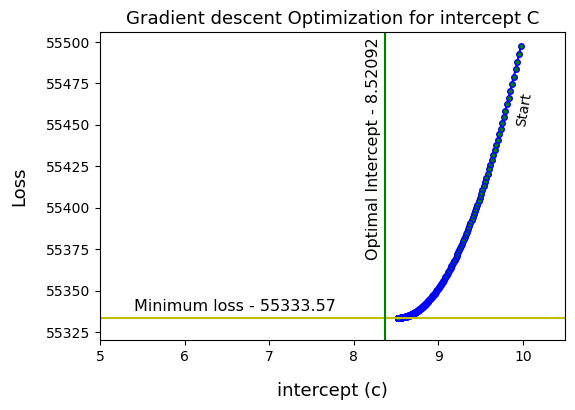

In [616]:
plt.figure(figsize=(6,4))
plt.plot(intercept_list,loss_list,marker='o',ms=4,color='b',mfc='g')
plt.axhline(y=Min_loss_intercept,c='y')
plt.axvline(x=Global_minima_intercept,c='g')
plt.title("Gradient descent Optimization for intercept C",fontsize=13)
plt.ylabel("Loss",fontsize=13,labelpad=13)
plt.xlabel("intercept (c)",fontsize=13,labelpad=13)
plt.text(5.4,55338,f"Minimum loss - {loss_list[-1]:0.2f}",fontsize=11.5)
plt.text(8.15,55370,f"Optimal Intercept - {intercept:0.5f}",rotation=90,fontsize=11.5)
plt.text(9.9,55450,"Start",rotation=80)
plt.xlim(left=5,right=10.5)
plt.ylim(bottom=55320)
plt.show()

## Tuning slope for minimum loss

In [614]:
epoch = 750
# Initializing the slope
m = 100
learning_rate = 0.0001
loss_m_list = []  #list to fill loss at each step
slope_list = []   #list to fill corresponding slopes at each loss
flag1 = 0
for i in range(epoch):
    # calculation of y_predicted using current intercept
    y_pred_manual = (m*X_train_1.ravel()) + 8.520901857856273
    
    # calculating total loss corresponding to current intercept
    loss_m = np.sum(np.square(y_train_1.ravel() - y_pred_manual))
    
    loss_m_list.append(loss_m)

    # Slope for gradint, i.e derivative wrt to intercept 
    slope_m = -2*np.sum((y_train_1.ravel()-y_pred_manual)*X_train_1.ravel())
    
    # calculated step size
    step_size = learning_rate * slope_m
    m = m - step_size
    # printing the slope corresponding to minimum loss
    slope_list.append(m)
print(f"Minimum loss = {loss_m_list[-1]:0.2f}")
print("-"*50)
print(f"Slope corresponding to minimum loss - {m:0.4f}")  

Minimum loss = 55333.57
--------------------------------------------------
Slope corresponding to minimum loss - 97.7247


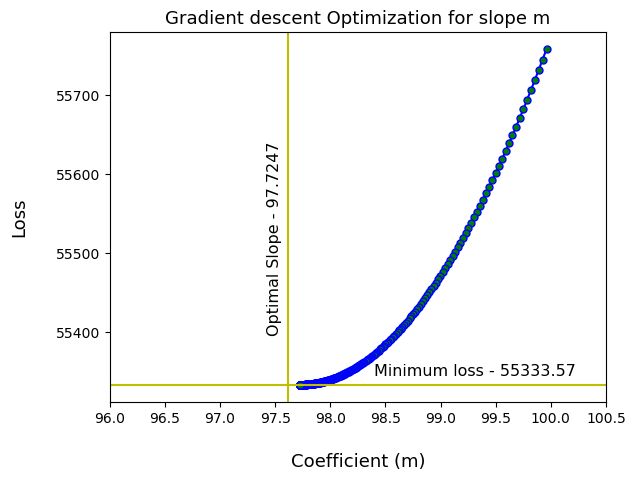

In [604]:
plt.plot(slope_list,loss_m_list,marker='o',ms=5,color='b',mfc='g')
plt.axhline(y=Min_loss_slope,c='y')
plt.axvline(x=Global_minima_slope,c='y')
plt.title("Gradient descent Optimization for slope m",fontsize=13)
plt.ylabel("Loss",fontsize=13,labelpad=20)
plt.xlabel("Coefficient (m)",fontsize=13,labelpad=20)
plt.text(98.40,55345,f"Minimum loss - {loss_m_list[-1]:0.2f}",fontsize=11.5)
plt.text(97.43,55400,f"Optimal Slope - {m:0.4f}",rotation=90,fontsize=11.5)
plt.xlim(left=96,right=100.5)
plt.show()

In [205]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [211]:
print(f"Intercept calculated from Manual Gradient descent Optimization - {Global_minima_slope:0.4f}")
print(f"Intercept from sklearn class Linear model - {model.coef_[0]:0.4f}")
print("-"*75)
print(f"Intercept calculated from Manual Gradient descent Optimization - {Global_minima_intercept:0.4f}")
print(f"Intercept from sklearn class Linear model - {model.intercept_:0.4f}")

Intercept calculated from Manual Gradient descent Optimization - 97.6169
Intercept from sklearn class Linear model - 97.7247
---------------------------------------------------------------------------
Intercept calculated from Manual Gradient descent Optimization - 8.3660
Intercept from sklearn class Linear model - 8.5209


In [213]:
from sklearn.metrics import mean_squared_error as mse

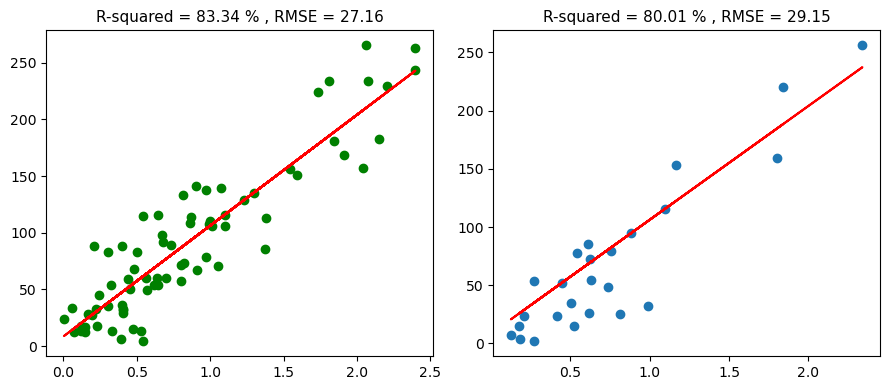

In [215]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.scatter(X_train,y_train,label='Data points',c='g')
plt.plot(X_train,model.predict(X_train),'r-',label='Best fit line')
RMSE_train = mse(y_train,model.predict(X_train),squared=False)
plt.title(f"R-squared = {r2_score(y_train,model.predict(X_train))*100:0.2f} % , RMSE = {RMSE_train:0.2f}",
          fontsize=11)

plt.subplot(122)
plt.scatter(X_test,y_test,label='Data points')
RMSE_test = mse(y_test,model.predict(X_test),squared=False)
plt.plot(X_test,model.predict(X_test),'r-',label='Best fit line')
plt.title(f"R-squared = {r2_score(y_test,model.predict(X_test))*100:0.2f} % , RMSE = {RMSE_test:0.2f}",fontsize=11)
plt.tight_layout()
plt.show()

## Combined above two method

In [216]:
loss_list,intercept_list,loss_m_list,slope_list = list(),list(),list(),list()

In [729]:
class Gradient_descent:
    def __init__(self,epoch,learning_rate):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.__slope = 100
        self.__intercept = 0
        self.__loss_list = list()
        self.__intercept_list = list()
        self.__slope_list = list()
    def fit(self,X,y):
        for i in range(self.epoch):
            # y = mx+c
            y_pred = (self.__slope*X.ravel()) + self.__intercept
            loss = np.sum(np.square(y - y_pred))
            
            self.__loss_list.append(loss)
            # derivative w.r.t intercept
            intercept_derivative = -2*np.sum(y-y_pred)
            # derivative w.r.t slope
            slope_derivative = -2*np.sum((y-y_pred)*X.ravel())
            # step size
            step_size_intercept = self.learning_rate * intercept_derivative
            step_size_slope = self.learning_rate * slope_derivative
            # correction of intercept & slope @ each step
            self.__intercept = self.__intercept - step_size_intercept
            self.__slope = self.__slope - step_size_slope
            
            self.__intercept_list.append(self.__intercept)
            self.__slope_list.append(self.__slope)
        self.every_step_loss = np.array(self.__loss_list)
        self.every_step_intercept = np.array(self.__intercept_list)
        self.every_step_slope = np.array(self.__slope)
        self.intercept_ = self.__intercept
        self.coef_ = self.__slope

In [730]:
lr = Gradient_descent(1000,0.001)
lr.fit(X_train,y_train)

In [731]:
lr.intercept_

8.520901857856064

In [732]:
lr.coef_

97.7246520667477

In [674]:
epoch = 1000
# Initializing intercept & slope
intercept = 100
m = 0
learning_rate = 0.001
loss_list,intercept_list,slope_list = list(),list(),list()
flag = 0
for i in range(epoch):
    # calculation of y_predicted using current intercept
    y_pred_manual = (m*X_train_1.ravel()) + intercept
    
    # calculating total loss corresponding to current intercept
    loss = np.sum(np.square(y_train_1 - y_pred_manual))
   
    loss_list.append(loss)
    
    # derivative wrt to intercept 
    intercept_derivative = -2*np.sum(y_train_1-y_pred_manual)
    # derivative wrt to slope
    slope_derivative = -2*np.sum((y_train_1-y_pred_manual)*X_train_1.ravel())
    
    # calculated step size
    step_size_intercept = learning_rate * intercept_derivative
    step_size_slope = learning_rate * slope_derivative
    intercept = intercept - step_size_intercept
    m = m - step_size_slope
    intercept_list.append(intercept)
    slope_list.append(m)

In [675]:
m

97.72465206674475

In [676]:
intercept

8.520901857859153

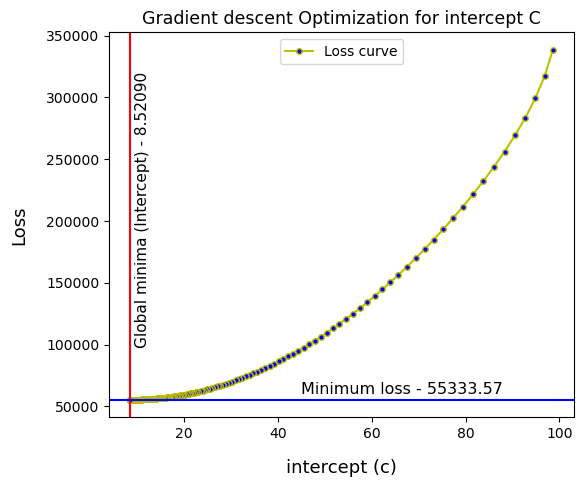

In [709]:
plt.figure(figsize=(6,5))
plt.plot(intercept_list,loss_list,marker='o',ms=4,color='y',mfc='b',label='Loss curve')
plt.title("Gradient descent Optimization for intercept C",fontsize=12.5)
plt.axvline(x=intercept,c='r')
plt.text(9.5,100000,f"Global minima (Intercept) - {intercept:0.5f}",rotation=90,fontsize=11)
plt.axhline(y=loss_list[-1],c='b')
plt.text(45,60000,f"Minimum loss - {loss_list[-1]:0.2f}",fontsize=11.5)
plt.ylabel("Loss",fontsize=13,labelpad=13)
plt.xlabel("intercept (c)",fontsize=13,labelpad=13)
plt.legend()
plt.show()

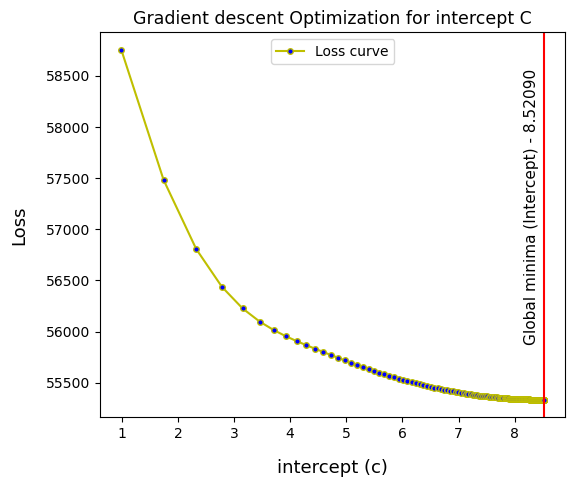

In [742]:
x = lr.every_step_intercept
y = lr.every_step_loss
plt.figure(figsize=(6,5))
plt.plot(x,y,marker='o',ms=4,color='y',mfc='b',label='Loss curve')
plt.axvline(x=intercept,c='r')
plt.text(x[-1]-0.35,55900,f"Global minima (Intercept) - {x[-1]:0.5f}",rotation=90,fontsize=11)
plt.axhline(y=loss_list[-1],c='b')
plt.text(45,60000,f"Minimum loss - {loss_list[-1]:0.2f}",fontsize=11.5)
plt.title("Gradient descent Optimization for intercept C",fontsize=12.5)
plt.ylabel("Loss",fontsize=13,labelpad=13)
plt.xlabel("intercept (c)",fontsize=13,labelpad=13)
plt.legend(loc='upper center')
plt.show()

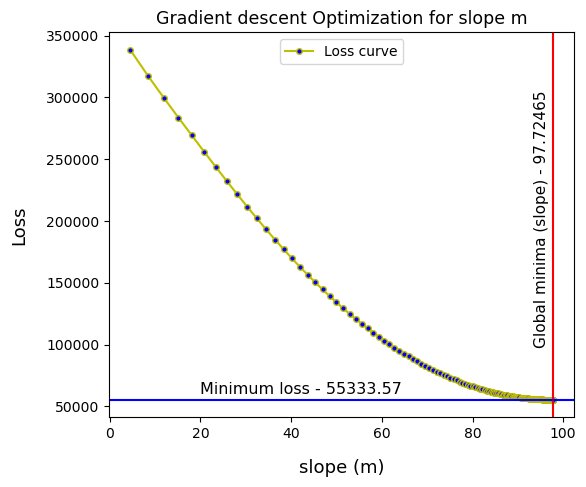

In [725]:
plt.figure(figsize=(6,5))
plt.plot(slope_list,loss_list,marker='o',ms=4,color='y',mfc='b',label='Loss curve')
plt.title("Gradient descent Optimization for slope m",fontsize=12.5)
plt.axvline(x=m,c='r')
plt.text(93.5,100000,f"Global minima (slope) - {m:0.5f}",rotation=90,fontsize=11)
plt.axhline(y=loss_list[-1],c='b')
plt.text(20,60000,f"Minimum loss - {loss_list[-1]:0.2f}",fontsize=11.5)
plt.ylabel("Loss",fontsize=13,labelpad=13)
plt.xlabel("slope (m)",fontsize=13,labelpad=13)
plt.legend(loc='upper center')
plt.show()

In [84]:
epoch = 30
# Initializing the slope
m = 100
learning_rate = 0.0001
loss_m_list = []  #list to fill loss at each step
slope_list = []   #list to fill corresponding slopes at each loss
flag1 = 0
for i in range(epoch):
    # calculation of y_predicted using current intercept
    y_pred_manual = (m*X_train_1.ravel()) + 8.520901857856273
    
    # calculating total loss corresponding to current intercept
    loss_m = np.sum(np.square(y_train_1.ravel() - y_pred_manual))
    
    # Printing the loss where calculated loss is more than previous loss
    # i.e printing the minimum loss where loss starts increasing
    # The below if block only executes once
    if (len(loss_m_list) > 2) and (loss_m > loss_m_list[-1]) and flag1==0:
        print(f"Minimum loss - {loss_m_list[-1]:0.4f}")
        print("-"*50)
        Min_loss_slope = round(loss_m_list[-1],4)
        flag1 = 1
    loss_m_list.append(loss_m)

    # Slope for gradint, i.e derivative wrt to intercept 
    slope_m = -2*np.sum((y_train_1.ravel()-y_pred_manual-8.520901857856273)*X_train_1.ravel())
    
    # calculated step size
    step_size = learning_rate * slope_m
    m = m - step_size
    # printing the slope corresponding to minimum loss
    # The below if block only executes once
    if flag1 == 1:
        Global_minima_slope = round(slope_list[-1],4)
        print(f"Slope corresponding to minimum loss- {Global_minima_slope:0.4f}")
        flag1 = 2
    slope_list.append(m)

Minimum loss - 55333.5697
--------------------------------------------------
Slope corresponding to minimum loss- 97.6169
